In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('Train_data.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [4]:
data = df

In [5]:
# Encode categorical variables
le_protocol_type = LabelEncoder()
data['protocol_type'] = le_protocol_type.fit_transform(data['protocol_type'])

le_service = LabelEncoder()
data['service'] = le_service.fit_transform(data['service'])

le_flag = LabelEncoder()
data['flag'] = le_flag.fit_transform(data['flag'])

# Encode the 'class' column
le_class = LabelEncoder()
data['class'] = le_class.fit_transform(data['class'])

In [6]:
X = data.drop(columns=['class'])
y = data['class']

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

In [9]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Build the model
model = Sequential()
model.add(GRU(128, input_shape=(
    X_train.shape[1], 1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=32, validation_split=0.2)

Epoch 1/10
504/504 [==============================] - 25s 43ms/step - loss: 0.2606 - accuracy: 0.9040 - val_loss: 0.1986 - val_accuracy: 0.9157
Epoch 2/10
504/504 [==============================] - 21s 42ms/step - loss: 0.1794 - accuracy: 0.9272 - val_loss: 0.1491 - val_accuracy: 0.9452
Epoch 3/10
504/504 [==============================] - 21s 43ms/step - loss: 0.1393 - accuracy: 0.9473 - val_loss: 0.1218 - val_accuracy: 0.9650
Epoch 4/10
504/504 [==============================] - 22s 43ms/step - loss: 0.0890 - accuracy: 0.9681 - val_loss: 0.0667 - val_accuracy: 0.9749
Epoch 5/10
504/504 [==============================] - 21s 42ms/step - loss: 0.0699 - accuracy: 0.9736 - val_loss: 0.0587 - val_accuracy: 0.9774
Epoch 6/10
504/504 [==============================] - 21s 42ms/step - loss: 0.0616 - accuracy: 0.9770 - val_loss: 0.0599 - val_accuracy: 0.9767
Epoch 7/10
504/504 [==============================] - 21s 41ms/step - loss: 0.0575 - accuracy: 0.9781 - val_loss: 0.0756 - val_accuracy:

In [16]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))

158/158 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2365
           1       0.99      0.99      0.99      2674

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039



In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

158/158 [==============================] - 2s 12ms/step - loss: 0.0402 - accuracy: 0.9841
Test Loss: 0.04024496674537659
Test Accuracy: 0.9841238260269165


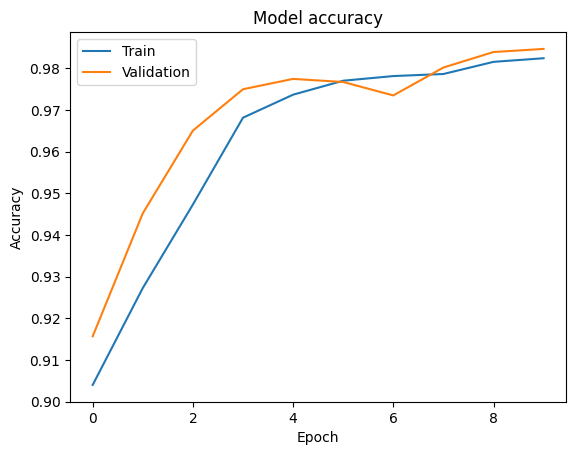

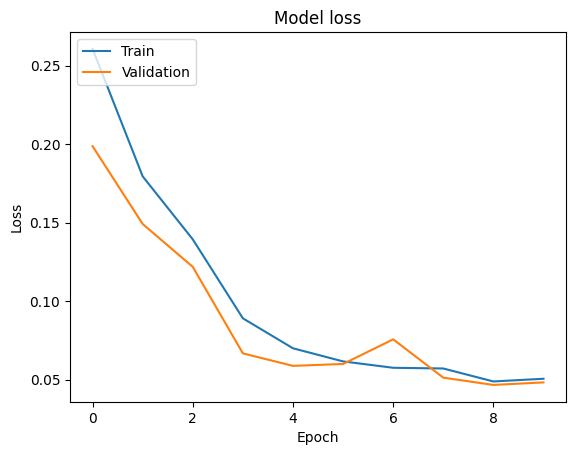

In [18]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
model.save("grumodel.h5")